In [173]:
import pandas as pd
#used for statistical analysis, for reading the dataset and for computing missing valus etc.
import numpy as np
#used for mathematical functions/Applicaton
import math 
#used for mathematics
#scikitlearn is used for data minin g and data analysis and is built on Numpy, SciPy, and matplotlib
from sklearn.model_selection import train_test_split
#to split the model into train and test data sets we use the sub library under sklearn which is model_selection --> this is related to model selection
#based on split of train and test data
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder, OrdinalEncoder
#this is used for pre processing the dataset to make the dataset model ready --> for anytihng realted to mdoelign hav e to specify the sub library under sklearn
    #standard scalar is used for feature scaling where there are different columns in different units in order to make all of them in the same scale for a fair comparison
    #label encoder is used for any encoding where we have two or three distinct categories iwthin a column in order to change that into numerical indicators due to python's understanding
        # to check the number of distinct categoreis of each column you have to do value_counts
import matplotlib.pyplot as plt
#used for plotting
import seaborn as sns
#visualizaiton library that is in fact based on matplotlib to draw statistical graphics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm #needed for modeling

In [136]:
diamondsdata = sns.load_dataset("diamonds")
diamondsdata
#the target variable here is price, which is continuous --> so can do linear regression 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [137]:
diamondsdata.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [138]:
diamondsdata.cut.value_counts()
#need to ordinal encoding

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [139]:
diamondsdata.color.value_counts()
#need to do one hot encoding, as there are 7 categories

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [140]:
diamondsdata.clarity.value_counts()
#one hot encoding

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [141]:
diamonds_sample = pd.DataFrame(diamondsdata)

In [142]:
# Define the order for the cut categories
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [143]:
encoder = OrdinalEncoder(categories=[cut_categories])
diamonds_sample['cut_encoded'] = encoder.fit_transform(diamonds_sample[['cut']])

In [144]:
diamonds_sample #you can see the cut_encoded column at the end, now after you can just drop the "cut" column


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.0


In [145]:
diamonds_sample.cut_encoded.value_counts()

cut_encoded
4.0    21551
3.0    13791
2.0    12082
1.0     4906
0.0     1610
Name: count, dtype: int64

In [146]:
diamonds_sample.drop(['cut'], axis=1, inplace=True)

In [147]:
diamonds_sample

,carat,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4.0
53936,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0
53937,0.70,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0
53938,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.0


In [148]:
diamonds_encoded = pd.get_dummies(diamonds_sample, columns=['color','clarity'])  # one hot encoding
diamonds_encoded

,carat,depth,table,price,x,y,z,cut_encoded,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,4.0,True,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,True,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,2.0,True,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [149]:
diamonds_encoded = diamonds_encoded.astype("int") #make to numeric form
diamonds_encoded

,carat,depth,table,price,x,y,z,cut_encoded,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0,61,55,326,3,3,2,4,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,59,61,326,3,3,2,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,56,65,327,4,4,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,62,58,334,4,4,2,3,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,63,58,335,4,4,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,60,57,2757,5,5,3,4,1,0,...,0,0,0,0,0,0,0,1,0,0
53936,0,63,55,2757,5,5,3,1,1,0,...,0,0,0,0,0,0,0,1,0,0
53937,0,62,60,2757,5,5,3,2,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0,61,58,2757,6,6,3,3,0,0,...,0,0,0,0,0,0,0,0,1,0


In [150]:
diamonds_encoded.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_encoded',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1',
       'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [151]:
diamonds_encoded.isnull().sum()

carat           0
depth           0
table           0
price           0
x               0
y               0
z               0
cut_encoded     0
color_D         0
color_E         0
color_F         0
color_G         0
color_H         0
color_I         0
color_J         0
clarity_IF      0
clarity_VVS1    0
clarity_VVS2    0
clarity_VS1     0
clarity_VS2     0
clarity_SI1     0
clarity_SI2     0
clarity_I1      0
dtype: int64

In [152]:
# to not have mutlicolinarity will take away 6th color and 8th clairty as if values of all others are 0 can deduce last values
diamonds_encoded.drop(['color_J','clarity_I1' ], axis=1, inplace=True)

In [153]:
diamonds_encoded

,carat,depth,table,price,x,y,z,cut_encoded,color_D,color_E,...,color_G,color_H,color_I,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2
0,0,61,55,326,3,3,2,4,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,59,61,326,3,3,2,3,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,56,65,327,4,4,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,62,58,334,4,4,2,3,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,63,58,335,4,4,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,60,57,2757,5,5,3,4,1,0,...,0,0,0,0,0,0,0,0,1,0
53936,0,63,55,2757,5,5,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0
53937,0,62,60,2757,5,5,3,2,1,0,...,0,0,0,0,0,0,0,0,1,0
53938,0,61,58,2757,6,6,3,3,0,0,...,0,1,0,0,0,0,0,0,0,1


In [154]:
X = diamonds_encoded.drop('price', axis=1)

In [155]:
Y = diamonds_encoded['price']

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [159]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [160]:
y_pred = model.predict(X_test)

In [163]:
#evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}") #how much is the average of square of the errors cos need suqare so negative signs are cnacled
print(f"R^2 Score: {r2:.2f}") #shows accuracy

Mean Squared Error: 2173002.95
R^2 Score: 0.86


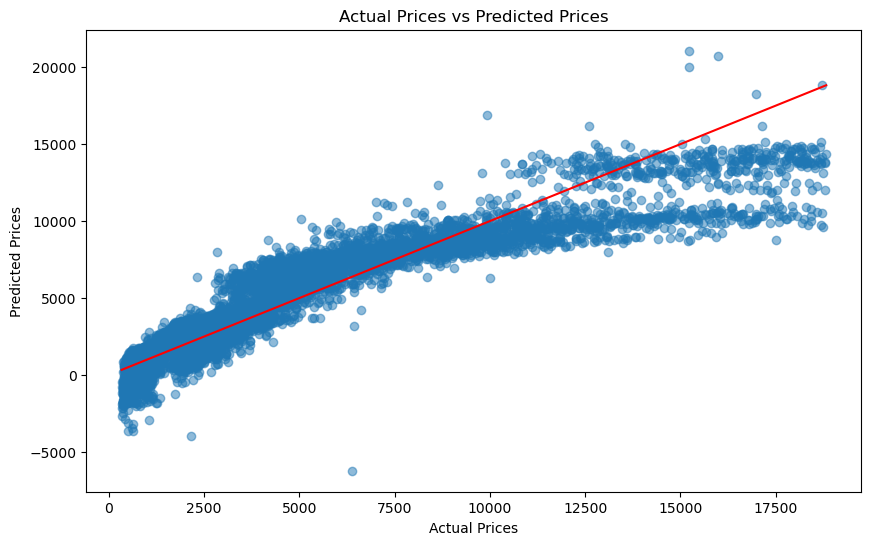

In [164]:
# Visualizing the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Application of OLS models (ordinary least squares):

OLS is a type of of linear regression method is estimates the parameters in a linear regression model by minimizing the sum of squared residuals (difference between observed and predicted vals). IT assumes linear relationships between the dependent variable and the independent variables and finally helps us in the prediction


In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [174]:
# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [175]:
# Fitting the OLS Model
ols_model = sm.OLS(Y_train, X_train_const).fit()

In [176]:
#Evaluating the Model
print(ols_model.summary())
# Making Predictions
y_pred = ols_model.predict(X_test_const)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:42:59   Log-Likelihood:            -3.7584e+05
No. Observations:               43152   AIC:                         7.517e+05
Df Residuals:                   43131   BIC:                         7.519e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.572e+04    511.962    -30.701   

In [178]:
# Calculating metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2173002.95
R^2 Score: 0.86


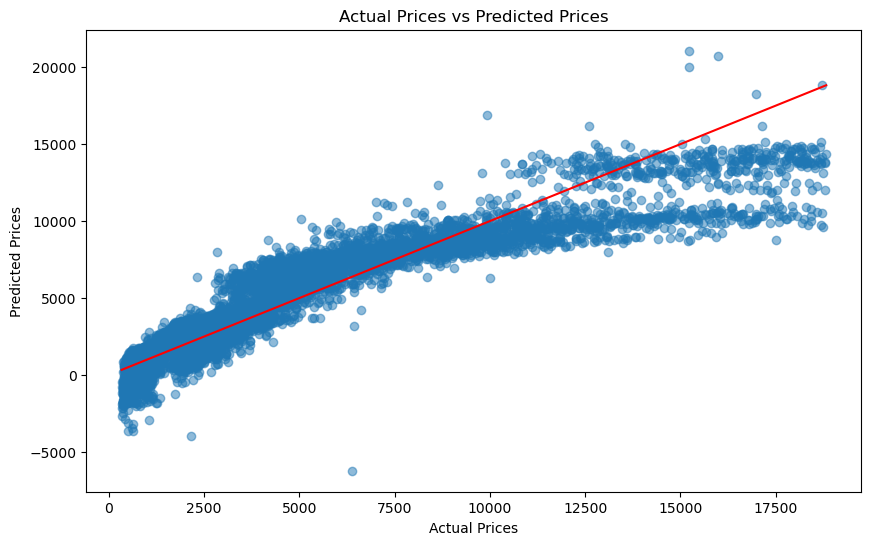

In [179]:
# Visualizing the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [177]:
#linear regression using continous --> carat, depth, table,x,y,z
#need to do train test split first
#dont add in gitbhb w/out train test split version, add above with TTS
reg = linear_model.LinearRegression()
reg.fit(diamonds_encoded[['carat','depth','table','x','y','z','cut_encoded']],diamonds_encoded.price)


LinearRegression()

In [166]:
reg.coef_

array([2820.05056424,  -20.45746317,  -42.83599857, 1653.66160251,
        427.15072358, -224.51446068,  188.94477684])

In [167]:
reg.intercept_

-4262.860736643977

In [168]:
#do some prediction for price based on some random values --> say x is 4.37 (taking cos most common), y is 4.34, z is 2.70,
# table is 56.0, carat is 0.30, depth is 62.0, cut encoded do 4.0
#or can do by mutlipyign each correspoding coef to value but this is shortcut
reg.predict([[0.30,62.0,56.0,4.37,4.34,2.70,4.0]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2145.90120335])

In [169]:
(10660.23033165 * 0.30) + (-150.75553293 * 62.0) + (-54.01529955 * 56.0) + (-1324.57751506 * 4.37) + (80.90013121 * 4.34) + (58.69827701 * 2.70) + (179.1429254 * 4.0) + 14238.68170393772

502.81086513892114

In [113]:
#what visualizations should I do?